In [ ]:
import numpy as np 
from google.colab import files
import io
import pandas as pd

In [ ]:
uploaded = files.upload()

Saving blobs.txt to blobs.txt


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['blobs.txt'] ), sep=" " ,  header = None)
print(df)

            0        1
0    -7.87157 -4.86573
1    -4.76661 -6.87944
2    -6.67986 -5.83080
3    -8.93021 -4.15571
4    -7.91375 -4.22840
...       ...      ...
2995 -8.06037 -4.84080
2996  7.47328  0.37321
2997  6.91832 -0.32132
2998 -8.23828 -4.00405
2999 -5.75112 -5.99531

[3000 rows x 2 columns]


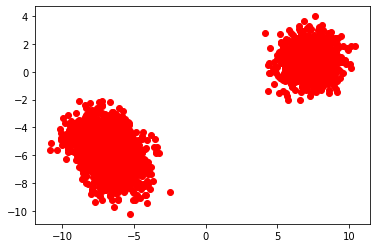

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df[0],df[1], 'ro')

In [ ]:
k = input ("Enter K Value:")
k=int(k)
print(k)

Enter K Value:2
2


In [ ]:
len(df)

3000

In [ ]:
data_set = df.to_numpy()
Output={}

In [ ]:
#centroids=np.array(df.sample(n=k, random_state=1))
import random as rd
centroids=np.array([]).reshape(2,0)
for i in range(k):
    rand=rd.randint(0,len(df)-1)
    rand=int(rand)
    centroids=np.c_[centroids,data_set[rand]]
print(centroids)

[[-4.74583  8.85217]
 [-5.07069  0.07231]]


In [ ]:
count= len(data_set)/k
countn = 0
flag=0
while countn<200 :
      countn=countn+1
      EuclidianDistance=np.array([]).reshape(len(data_set),0)
      for i in range(k):
          temp=np.sum((data_set-centroids[:,i])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,temp]
      minDisVec=np.argmin(EuclidianDistance,axis=1)+1
      tempOutDict={}
      for j in range(k):
          tempOutDict[j+1]=np.array([]).reshape(2,0) #2=for 2 features
      for i in range(len(data_set)):
          tempOutDict[minDisVec[i]]=np.c_[tempOutDict[minDisVec[i]],data_set[i]]
     
      for m in range(k):
          tempOutDict[m+1]=tempOutDict[m+1].T
    
      for n in range(k):
         centroids[:,n]=np.mean(tempOutDict[n+1],axis=0)
  
      Output=tempOutDict
      flag=flag+1
      #print(Output)
      #sumf=0
      #for i in range (k):
        #sum=(len(tempOutDict[i+1]))/count
        #sumf=sum+sumf
     # if sumf==k:
       # break
      #countn=countn+1  




In [ ]:
print(flag)

200


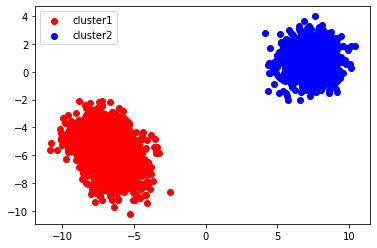

In [ ]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
for i in range(k):
    plt.scatter(Output[i+1][:,0],Output[i+1][:,1],c=color[i],label=labels[i])
plt.legend()
plt.show()